##Modelos de Aprendizaje Supervisado
###Predicción de probabilidad de incumplimiento
### Comparativo por AUC ROC
### Mejores hiperparámetros con apredizaje de maquina
### Bosque aleatorio
### logit
### Bayes Ingenuo Gaussiano
### Máquina de Vectores de Soporte





In [ ]:
# Conexión con google drive
#from google.colab import drive
#drive.mount('/content/drive')
#%cd "/content/drive/MyDrive/Colab Notebooks/1 - DATA ANALYTICS - DIP UNIVALLE"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/1 - DATA ANALYTICS - DIP UNIVALLE


In [ ]:
from google.colab import files
files.upload()

Saving Copia de df_model_Eco_individual_v4 (002).xlsx to Copia de df_model_Eco_individual_v4 (002) (1).xlsx


{'Copia de df_model_Eco_individual_v4 (002) (1).xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\xe4\xcb\\\x0f\x9c\x01\x00\x00\xa7\x06\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [ ]:
# importar la biblioteca para análisis de datos
import numpy as np

# importar la biblioteca para graficación
import matplotlib.pyplot as plt
%matplotlib inline

# importar la biblioteca para manipulación y tratamiento de datos
import pandas as pd

## Lectura y preprocesamiento del conjunto de datos

In [ ]:
# leer el conjunto de datos a utilizar
df = pd.read_excel('Copia de df_model_Eco_individual_v4 (002).xlsx')

# mostrar las primeras 5 líneas del dataframe
df.head()

X4.Numero.de.Operacion   MoraMax  X18.Monto.Desembolsado.en.Dolares  \
0                 5019449  Recovery                            8746.36   
1                 6028761  Recovery                           10204.08   
2                 7079409  Recovery                            5102.04   
3                 2269603  Recovery                            3061.22   
4                 6031915  Recovery                            7142.86   

   X46.Numero.de.Cuotas  X68.Nro.de.Componentes.Directos  X101.Patrimonio  \
0                   120                                1            73680   
1                    82                                2            23358   
2                    65                                1             2086   
3                    49                                2            30500   
4                    71                                2            46370   

   X102.Activos  X104.Ingresos.por.Ventas  X34.Calificacion_num  UmApal1  \
0         73680                     71600                     1        1   
1        113047                    269200                     1        0   
2          3850                    141800                     1        0   
3         37500                    148800                     1        0   
4         67000                     62965                     1        1   

   X18.Monto.Desembolsado.en.Dolares_cat  X68.Nro.de.Componentes.Directos_cat  \
0                                      3                                    0   
1                                      3                                    1   
2                                      3                                    0   
3                                      2                                    1   
4                                      3                                    1   

   X101.Patrimonio_cat  X104.Ingresos.por.Ventas_cat  UmApal1_cat  Prob_Recov  \
0                    0                             2            1    0.670583   
1                    0                             4            0    0.883165   
2                    1                             3            0    0.834589   
3                    0                             3            0    0.746069   
4                    0                             2            1    0.796093   

   Score  
0    411  
1    468  
2    451  
3    427  
4    440

In [ ]:
# mostrar la información condensada del contenido del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20528 entries, 0 to 20527
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   X4.Numero.de.Operacion                 20528 non-null  int64  
 1   MoraMax                                20528 non-null  object 
 2   X18.Monto.Desembolsado.en.Dolares      20528 non-null  float64
 3   X46.Numero.de.Cuotas                   20528 non-null  int64  
 4   X68.Nro.de.Componentes.Directos        20528 non-null  int64  
 5   X101.Patrimonio                        20528 non-null  int64  
 6   X102.Activos                           20528 non-null  int64  
 7   X104.Ingresos.por.Ventas               20528 non-null  int64  
 8   X34.Calificacion_num                   20528 non-null  int64  
 9   UmApal1                                20528 non-null  int64  
 10  X18.Monto.Desembolsado.en.Dolares_cat  20528 non-null  int64  
 11  X6

In [ ]:
# determinar la cantidad de datos faltantes en las columnas
df.isnull().sum()

X4.Numero.de.Operacion                   0
MoraMax                                  0
X18.Monto.Desembolsado.en.Dolares        0
X46.Numero.de.Cuotas                     0
X68.Nro.de.Componentes.Directos          0
X101.Patrimonio                          0
X102.Activos                             0
X104.Ingresos.por.Ventas                 0
X34.Calificacion_num                     0
UmApal1                                  0
X18.Monto.Desembolsado.en.Dolares_cat    0
X68.Nro.de.Componentes.Directos_cat      0
X101.Patrimonio_cat                      0
X104.Ingresos.por.Ventas_cat             0
UmApal1_cat                              0
Prob_Recov                               0
Score                                    0
dtype: int64

In [ ]:
# determinar la cantidad de datos distintos en cada columna
df.nunique()

X4.Numero.de.Operacion                   20528
MoraMax                                      2
X18.Monto.Desembolsado.en.Dolares         1243
X46.Numero.de.Cuotas                       145
X68.Nro.de.Componentes.Directos              4
X101.Patrimonio                          15124
X102.Activos                             14159
X104.Ingresos.por.Ventas                 14515
X34.Calificacion_num                         6
UmApal1                                     22
X18.Monto.Desembolsado.en.Dolares_cat        4
X68.Nro.de.Componentes.Directos_cat          2
X101.Patrimonio_cat                          2
X104.Ingresos.por.Ventas_cat                 5
UmApal1_cat                                  2
Prob_Recov                                 101
Score                                       88
dtype: int64

Explorando la variable Monto desembolsado en dólares

In [ ]:
# estadísticas sobre el atributo de edad
df['X18.Monto.Desembolsado.en.Dolares'].describe()

count    20528.000000
mean      3896.360816
std       2825.048233
min         48.000000
25%       1603.500000
50%       3061.220000
75%       5116.620000
max      12000.000000
Name: X18.Monto.Desembolsado.en.Dolares, dtype: float64

<Axes: >

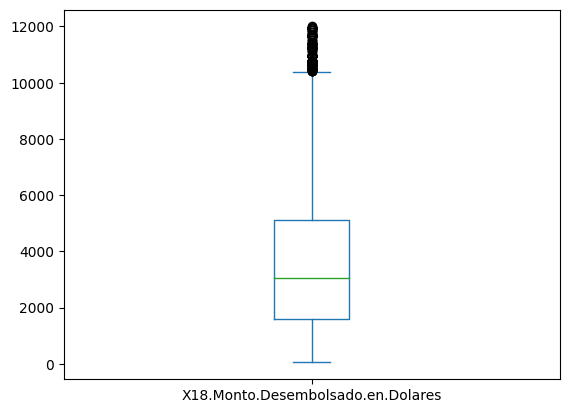

In [ ]:
# ilustra los datos de edad con un gráfico de caja
df['X18.Monto.Desembolsado.en.Dolares'].plot(kind='box')

In [ ]:
# determinar los puntos centrales de Age
print("Moda=", df['X18.Monto.Desembolsado.en.Dolares'].mode())
print("Media=", df['X18.Monto.Desembolsado.en.Dolares'].mean())
print("Mediana=", df['X18.Monto.Desembolsado.en.Dolares'].median())

Moda= 0    5102.04
Name: X18.Monto.Desembolsado.en.Dolares, dtype: float64
Media= 3896.360815958691
Mediana= 3061.22


In [ ]:
# la mayor cantidad de creditos desembolsados se encuentra entre los 2000 a 5000 dólares americanos

Explorando la variable Número de cuotas


In [ ]:
df['X46.Numero.de.Cuotas'].describe()

count    20528.000000
mean        34.859071
std         19.563813
min          1.000000
25%         24.000000
50%         36.000000
75%         42.000000
max        540.000000
Name: X46.Numero.de.Cuotas, dtype: float64

<Axes: >

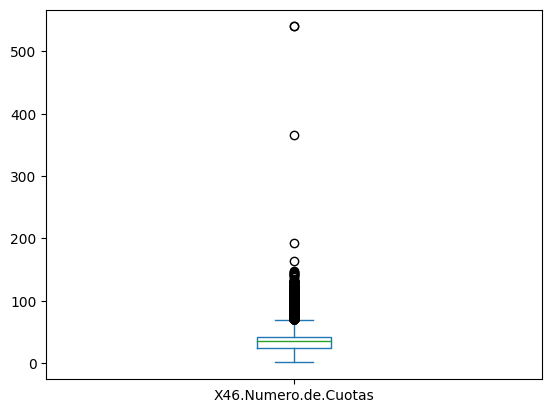

In [ ]:
df['X46.Numero.de.Cuotas'].plot(kind='box')

In [ ]:
print("Análisis de distribución central")
print("Moda=",df['X46.Numero.de.Cuotas'].mode())
print("Media=",df['X46.Numero.de.Cuotas'].mean())
print("Mediana=",df['X46.Numero.de.Cuotas'].median())


Análisis de distribución central
Moda= 0    36
Name: X46.Numero.de.Cuotas, dtype: int64
Media= 34.859070537802026
Mediana= 36.0


In [ ]:
df.describe()

X4.Numero.de.Operacion  X18.Monto.Desembolsado.en.Dolares  \
count            2.052800e+04                       20528.000000   
mean             7.194433e+06                        3896.360816   
std              1.539324e+07                        2825.048233   
min              6.620000e+02                          48.000000   
25%              2.086290e+06                        1603.500000   
50%              3.027040e+06                        3061.220000   
75%              5.037906e+06                        5116.620000   
max              7.010563e+07                       12000.000000   

       X46.Numero.de.Cuotas  X68.Nro.de.Componentes.Directos  X101.Patrimonio  \
count          20528.000000                     20528.000000     2.052800e+04   
mean              34.859071                         1.345528     5.176253e+04   
std               19.563813                         0.487790     1.010299e+05   
min                1.000000                         1.000000     1.000000e+00   
25%               24.000000                         1.000000     1.017675e+04   
50%               36.000000                         1.000000     2.927550e+04   
75%               42.000000                         2.000000     6.147375e+04   
max              540.000000                         4.000000     8.435980e+06   

       X102.Activos  X104.Ingresos.por.Ventas  X34.Calificacion_num  \
count  2.052800e+04              2.052800e+04          20528.000000   
mean   6.889846e+04              2.490545e+05              3.114137   
std    1.252247e+05              3.413717e+05              2.439541   
min    1.000000e+00              1.000000e+02              1.000000   
25%    1.473675e+04              7.720000e+04              1.000000   
50%    3.848400e+04              1.744890e+05              1.000000   
75%    8.140750e+04              3.115005e+05              6.000000   
max    8.438993e+06              1.500000e+07              6.000000   

            UmApal1  X18.Monto.Desembolsado.en.Dolares_cat  \
count  20528.000000                           20528.000000   
mean       0.287899                               1.974279   
std        1.144938                               1.163466   
min        0.000000                               0.000000   
25%        0.000000                               1.000000   
50%        0.000000                               2.000000   
75%        0.000000                               3.000000   
max       63.000000                               3.000000   

       X68.Nro.de.Componentes.Directos_cat  X101.Patrimonio_cat  \
count                         20528.000000         20528.000000   
mean                              0.340511             0.165871   
std                               0.473892             0.371974   
min                               0.000000             0.000000   
25%                               0.000000             0.000000   
50%                               0.000000             0.000000   
75%                               1.000000             0.000000   
max                               1.000000             1.000000   

       X104.Ingresos.por.Ventas_cat   UmApal1_cat    Prob_Recov         Score  
count                  20528.000000  20528.000000  20528.000000  20528.000000  
mean                       2.854491      0.110970      0.579214    373.313669  
std                        1.460584      0.314103      0.307477    115.215884  
min                        0.000000      0.000000      0.000622     61.000000  
25%                        2.000000      0.000000      0.363244    356.000000  
50%                        4.000000      0.000000      0.713427    420.000000  
75%                        4.000000      0.000000      0.797626    440.000000  
max                        4.000000      1.000000      0.938726    499.000000

<Axes: >

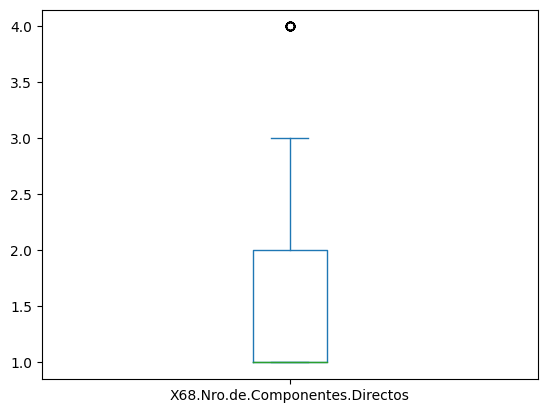

In [ ]:
df['X68.Nro.de.Componentes.Directos'].plot(kind='box')

<Axes: >

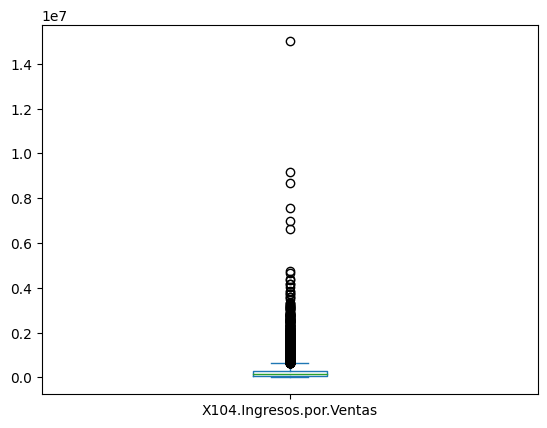

In [ ]:
df['X104.Ingresos.por.Ventas'].plot(kind='box')

In [ ]:
# la variable nro de componentes directos nos indican que la mayoria de los creditos fueron desembolsados con 1 o 2 participantes
# se identifica que las variables necesitan pasar por normalizado de datos

In [ ]:
# (sustituye datos faltantes de edad con la mediana)otro
#df['Age'].fillna(28, inplace=True)
#df.isnull().sum()

In [ ]:
# se eliminara X4.Numero.de.Operacion (ID) y las columnas categorizadas utilizadas en otras iteraciones, se realizará el modelamiento con la técnica Normalizado de datos utilizando un escalador de datos
#asi tambien se proceserá a eliminar calificación ya que explica muy bien mora maxima que desestima el modelado
df2 = df.drop(columns=['X18.Monto.Desembolsado.en.Dolares_cat',
'X68.Nro.de.Componentes.Directos_cat',
'X101.Patrimonio_cat',
'X104.Ingresos.por.Ventas_cat',
'UmApal1_cat',
'X4.Numero.de.Operacion',
'X34.Calificacion_num'])

# mostrar la información condensada del nuevo dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20528 entries, 0 to 20527
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MoraMax                            20528 non-null  object 
 1   X18.Monto.Desembolsado.en.Dolares  20528 non-null  float64
 2   X46.Numero.de.Cuotas               20528 non-null  int64  
 3   X68.Nro.de.Componentes.Directos    20528 non-null  int64  
 4   X101.Patrimonio                    20528 non-null  int64  
 5   X102.Activos                       20528 non-null  int64  
 6   X104.Ingresos.por.Ventas           20528 non-null  int64  
 7   UmApal1                            20528 non-null  int64  
 8   Prob_Recov                         20528 non-null  float64
 9   Score                              20528 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.6+ MB


In [ ]:
df2

MoraMax  X18.Monto.Desembolsado.en.Dolares  X46.Numero.de.Cuotas  \
0      Recovery                            8746.36                   120   
1      Recovery                           10204.08                    82   
2      Recovery                            5102.04                    65   
3      Recovery                            3061.22                    49   
4      Recovery                            7142.86                    71   
...         ...                                ...                   ...   
20523  Recovery                           11224.49                    46   
20524  Recovery                           11953.35                    59   
20525  Recovery                           11661.81                   144   
20526  Recovery                           11370.26                    70   
20527  Recovery                           10204.08                    97   

       X68.Nro.de.Componentes.Directos  X101.Patrimonio  X102.Activos  \
0                                    1            73680         73680   
1                                    2            23358        113047   
2                                    1             2086          3850   
3                                    2            30500         37500   
4                                    2            46370         67000   
...                                ...              ...           ...   
20523                                1            80279        164600   
20524                                2            99041         99041   
20525                                1            60360         95360   
20526                                1            95171        169400   
20527                                2            56307        277610   

       X104.Ingresos.por.Ventas  UmApal1  Prob_Recov  Score  
0                         71600        1    0.670583    411  
1                        269200        0    0.883165    468  
2                        141800        0    0.834589    451  
3                        148800        0    0.746069    427  
4                         62965        1    0.796093    440  
...                         ...      ...         ...    ...  
20523                    391044        0    0.797626    440  
20524                    324154        0    0.883165    468  
20525                    267864        0    0.797626    440  
20526                     93436        1    0.670583    411  
20527                    504000        0    0.883165    468  

[20528 rows x 10 columns]

In [ ]:
# introduce variables dummy para el atributo mora maxima
df3 = pd.get_dummies(df2, columns=['MoraMax'])

# muestra las primeras 5 líneas del dataframe resultante
df3.head()

X18.Monto.Desembolsado.en.Dolares  X46.Numero.de.Cuotas  \
0                            8746.36                   120   
1                           10204.08                    82   
2                            5102.04                    65   
3                            3061.22                    49   
4                            7142.86                    71   

   X68.Nro.de.Componentes.Directos  X101.Patrimonio  X102.Activos  \
0                                1            73680         73680   
1                                2            23358        113047   
2                                1             2086          3850   
3                                2            30500         37500   
4                                2            46370         67000   

   X104.Ingresos.por.Ventas  UmApal1  Prob_Recov  Score  MoraMax_NoRecovery  \
0                     71600        1    0.670583    411                   0   
1                    269200        0    0.883165    468                   0   
2                    141800        0    0.834589    451                   0   
3                    148800        0    0.746069    427                   0   
4                     62965        1    0.796093    440                   0   

   MoraMax_Recovery  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

In [ ]:
#donde 1 Recovery es que paga correctamente y 0 No Recovery el cliente que paga mal (con mora)

In [ ]:
# elimina una variable dummy para el atributo de MoraMax_noRecovery y renombra la columna
df3 = df3.drop(columns=['MoraMax_NoRecovery'])
df3 = df3.rename(columns={"MoraMax_Recovery": "MoraMax"})

# muestra las primeras 5 líneas del dataframe resultante
df3.head()

X18.Monto.Desembolsado.en.Dolares  X46.Numero.de.Cuotas  \
0                            8746.36                   120   
1                           10204.08                    82   
2                            5102.04                    65   
3                            3061.22                    49   
4                            7142.86                    71   

   X68.Nro.de.Componentes.Directos  X101.Patrimonio  X102.Activos  \
0                                1            73680         73680   
1                                2            23358        113047   
2                                1             2086          3850   
3                                2            30500         37500   
4                                2            46370         67000   

   X104.Ingresos.por.Ventas  UmApal1  Prob_Recov  Score  MoraMax  
0                     71600        1    0.670583    411        1  
1                    269200        0    0.883165    468        1  
2                    141800        0    0.834589    451        1  
3                    148800        0    0.746069    427        1  
4                     62965        1    0.796093    440        1

In [ ]:
# Normaliza los datos utilizando un escalador de datos
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

dataScaler = RobustScaler()
scaler = dataScaler.fit(df3)
dataScaled = scaler.transform(df3)

# muestra el arreglo resultante
dataScaled

array([[ 1.61825955,  4.66666667,  0.        , ..., -0.09863197,
        -0.10714286,  0.        ],
       [ 2.03319556,  2.55555556,  1.        , ...,  0.39075836,
         0.57142857,  0.        ],
       [ 0.58091383,  1.61111111,  0.        , ...,  0.27892985,
         0.36904762,  0.        ],
       ...,
       [ 2.44813442,  6.        ,  0.        , ...,  0.19383728,
         0.23809524,  0.        ],
       [ 2.36514551,  1.88888889,  0.        , ..., -0.09863197,
        -0.10714286,  0.        ],
       [ 2.03319556,  3.38888889,  1.        , ...,  0.39075836,
         0.57142857,  0.        ]])

In [ ]:
# crea un dataframe con los datos normalizados
data = pd.DataFrame(dataScaled)
data.columns = df3.columns

# muestra las primeras 5 líneas del dataframe resultante
data.head()

X18.Monto.Desembolsado.en.Dolares  X46.Numero.de.Cuotas  \
0                           1.618260              4.666667   
1                           2.033196              2.555556   
2                           0.580914              1.611111   
3                           0.000000              0.722222   
4                           1.161828              1.944444   

   X68.Nro.de.Componentes.Directos  X101.Patrimonio  X102.Activos  \
0                              0.0         0.865635      0.527908   
1                              1.0        -0.115358      1.118376   
2                              0.0        -0.530041     -0.519478   
3                              1.0         0.023871     -0.014759   
4                              1.0         0.333246      0.427714   

   X104.Ingresos.por.Ventas  UmApal1  Prob_Recov     Score  MoraMax  
0                 -0.439133      1.0   -0.098632 -0.107143      0.0  
1                  0.404229      0.0    0.390758  0.571429      0.0  
2                 -0.139517      0.0    0.278930  0.369048      0.0  
3                 -0.109641      0.0    0.075147  0.083333      0.0  
4                 -0.475987      1.0    0.190307  0.238095      0.0

In [ ]:
# muestra la información condensada del dataframe
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20528 entries, 0 to 20527
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   X18.Monto.Desembolsado.en.Dolares  20528 non-null  float64
 1   X46.Numero.de.Cuotas               20528 non-null  float64
 2   X68.Nro.de.Componentes.Directos    20528 non-null  float64
 3   X101.Patrimonio                    20528 non-null  float64
 4   X102.Activos                       20528 non-null  float64
 5   X104.Ingresos.por.Ventas           20528 non-null  float64
 6   UmApal1                            20528 non-null  float64
 7   Prob_Recov                         20528 non-null  float64
 8   Score                              20528 non-null  float64
 9   MoraMax                            20528 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


## Creación de conjuntos de entrenamiento y prueba

In [ ]:
# crea los conjuntos de entrenamiento (80%) y prueba (20%)
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.2, random_state=123)

X_train, y_train = train_df.drop(columns=["MoraMax"], axis=1), train_df["MoraMax"]
X_test, y_test = test_df.drop(columns=["MoraMax"], axis=1), test_df["MoraMax"]

# muestra la forma de los distintos conjuntos de datos obtenidos
print("Datos de entrenamiento=", X_train.shape, y_train.shape)
print("Datos de prueba=", X_test.shape, y_test.shape)

Datos de entrenamiento= (16422, 9) (16422,)
Datos de prueba= (4106, 9) (4106,)


##Creación de Modelos de Aprendizaje

### Bosque Aleatorio

In [ ]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de bosques aleatorios de 10 árboles con una profundidad máxima de 3
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rfcInicial_model = RandomForestClassifier(n_estimators=3,max_depth=3)
scores = pd.DataFrame(cross_validate(rfcInicial_model, X_train, y_train, cv=3, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.7874497625137011
score promedio de validación =  0.7876628912434539


fit_time  score_time  test_score  train_score
0  0.026309    0.008030    0.780965     0.789642
1  0.028746    0.004649    0.791560     0.785806
2  0.025316    0.005487    0.790464     0.786902

In [ ]:
# determina, entre algunas alternativas, los mejores valores de hiperparámetros
# para construir un bosque aleatorio para el problema
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 7],
              'max_features': ['sqrt', 'log2', None],
              'n_estimators': [10, 30, 60, 100]}
rfc_grid = GridSearchCV(RandomForestClassifier(random_state=1), param_grid = parameters,
                        return_train_score=True)
rfc_grid.fit(X_train, y_train)

# despliega los mejores hiperparámetros encontrados
print("Mejores hiperparámetros\n",rfc_grid.best_params_)

Mejores hiperparámetros
 {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
# quédate con el Bosque Aleatorio con los mejores hiperparámetros encontrados y
# despliega su score con los datos del conjunto de prueba.
rfc_model = rfc_grid.best_estimator_
rfc_model.score(X_test, y_test)

0.8085728202630297

              precision    recall  f1-score   support

        -1.0       0.87      0.66      0.75      1790
         0.0       0.78      0.92      0.84      2316

    accuracy                           0.81      4106
   macro avg       0.82      0.79      0.80      4106
weighted avg       0.82      0.81      0.80      4106



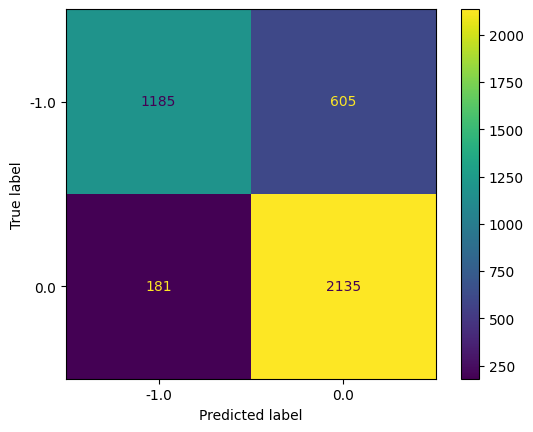

In [ ]:
# calcula las matriz de confusión y las métricas de evaluación con el conjunto
# de prueba para el mejor Bosque Aleatorio
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

ConfusionMatrixDisplay.from_estimator(rfc_model, X_test, y_test)
print(classification_report(y_test, rfc_model.predict(X_test)))

### Regresión Logística

In [ ]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de una Regresión Logística con C = 0.001 y solver = 'newton-cg'
from sklearn.linear_model import LogisticRegression

lrcInicial_model = LogisticRegression(C=0.001, solver='newton-cg')
scores = pd.DataFrame(cross_validate(lrcInicial_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.7901189510112958
score promedio de validación =  0.7900990656852273


fit_time  score_time  test_score  train_score
0  0.070559    0.004035    0.797931     0.789160
1  0.087431    0.003613    0.775411     0.791799
2  0.065372    0.003348    0.795371     0.789107
3  0.068378    0.003725    0.783191     0.790528
4  0.081504    0.003637    0.791717     0.789581
5  0.090693    0.003641    0.787454     0.791407
6  0.069565    0.003619    0.785018     0.790257
7  0.063659    0.003619    0.785018     0.791137
8  0.067478    0.003829    0.801462     0.788701
9  0.090089    0.004267    0.798417     0.789513

In [ ]:
# determina, entre algunas alternativas, los mejores valores de hiperparámetros
# para construir una Regresión Logística para el problema
from sklearn.model_selection import RandomizedSearchCV

parameters = {'C': np.logspace(-4, 4, 50),
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lrc_rand = RandomizedSearchCV(LogisticRegression(random_state=1), n_iter=48,
                              param_distributions = parameters,
                              return_train_score=True)
lrc_rand.fit(X_train, y_train)

# despliega los mejores hiperparámetros encontrados
print("Mejores hiperparámetros\n", lrc_rand.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Mejores hiperparámetros
 {'solver': 'sag', 'C': 0.004291934260128779}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# quédate con la Regresión Logística con los mejores hiperparámetros encontrados y
# despliega su score con los datos del conjunto de prueba.
lrc_model = lrc_rand.best_estimator_
lrc_model.score(X_test, y_test)

0.7873843156356551

              precision    recall  f1-score   support

        -1.0       0.84      0.64      0.72      1790
         0.0       0.76      0.90      0.83      2316

    accuracy                           0.79      4106
   macro avg       0.80      0.77      0.78      4106
weighted avg       0.79      0.79      0.78      4106



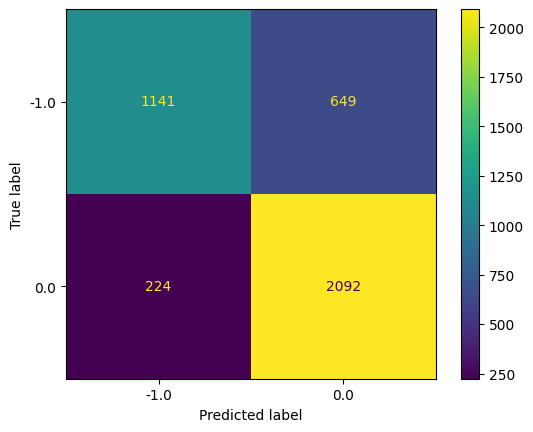

In [ ]:
# calcula las matriz de confusión y las métricas de evaluación con el conjunto
# de prueba para la mejor Regresión Logística
ConfusionMatrixDisplay.from_estimator(lrc_model, X_test, y_test)
print(classification_report(y_test, lrc_model.predict(X_test)))

### Bayes Ingenuo Gaussiano

In [ ]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de Bayes Ingenuo Gaussiano
from sklearn.naive_bayes import GaussianNB

gnbc_model = GaussianNB()

scores = pd.DataFrame(cross_validate(gnbc_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.7752337721638273
score promedio de validación =  0.7746932878049793


fit_time  score_time  test_score  train_score
0  0.011556    0.002562    0.774802     0.775222
1  0.006622    0.002440    0.761412     0.776304
2  0.006544    0.002387    0.783800     0.775101
3  0.006938    0.002327    0.765530     0.776049
4  0.006607    0.002559    0.784409     0.773816
5  0.006860    0.002494    0.772229     0.775304
6  0.006642    0.002452    0.759440     0.777064
7  0.006422    0.002482    0.775274     0.775440
8  0.006398    0.002286    0.786845     0.773613
9  0.006571    0.002342    0.783191     0.774425

              precision    recall  f1-score   support

        -1.0       0.83      0.59      0.69      1790
         0.0       0.74      0.91      0.81      2316

    accuracy                           0.77      4106
   macro avg       0.78      0.75      0.75      4106
weighted avg       0.78      0.77      0.76      4106



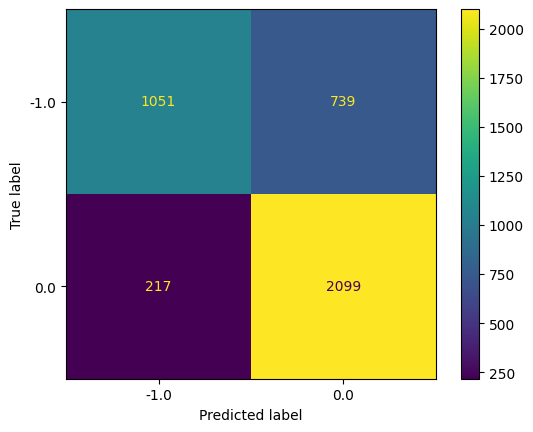

In [ ]:
# calcula las matriz de confusión y las métricas de evaluación con el conjunto
# de prueba para Bayes Ingenuo Gaussiano
gnbc_model.fit(X_train, y_train) # No se ha entrenado el modelo

ConfusionMatrixDisplay.from_estimator(gnbc_model, X_test, y_test)
print(classification_report(y_test, gnbc_model.predict(X_test)))

### Máquina de Vectores de Soporte



In [ ]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de una Máquina de Vectores de Soporte con un parámetro de regularización de
# 0.01 y un kernel polinomial
from sklearn.svm import SVC

svmc_model = SVC(C=0.01, kernel="poly")

scores = pd.DataFrame(cross_validate(svmc_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.7246376839792336
score promedio de validación =  0.7240897974131572


fit_time  score_time  test_score  train_score
0  23.629251    0.442714    0.726111     0.724474
1  17.826649    0.438227    0.719416     0.725218
2  18.356845    0.421232    0.719854     0.725034
3  16.577282    0.420669    0.718636     0.725304
4  19.103301    0.421699    0.726553     0.724290
5  19.090165    0.437389    0.720463     0.725034
6  19.159270    0.853685    0.718636     0.725304
7  21.816110    0.454776    0.725335     0.724425
8  16.931854    0.426657    0.731425     0.723748
9  14.697731    0.420011    0.734470     0.723545

In [ ]:
# determina, entre algunas alternativas, los mejores valores de hiperparámetros
# para construir una máquina de vectores de soporte para el problema
#parameters = {'C': [0.01, 0.1, 1, 1, 4],
              #'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
#svmc_grid = GridSearchCV(SVC(random_state=1), param_grid = parameters,
                         #return_train_score=True)
#svmc_grid.fit(X_train, y_train)
#print("Mejores hiperparámetros\n",svmc_grid.best_params_)

In [ ]:
# quédate con la Máquina de Vectores de Soporte con los mejores hiperparámetros
# encontrados y despliega su score con los datos del conjunto de prueba.
#svmc_model = svmc_grid.best_estimator_
#svmc_model.score(X_test, y_test)

In [ ]:
# calcula las matriz de confusión y las métricas de evaluación con el conjunto
# de prueba para la mejor Máquina de Vectores de Soporte
#ConfusionMatrixDisplay.from_estimator(svmc_model, X_test, y_test)
#print(classification_report(y_test, svmc_model.predict(X_test)))

## Mejor Modelo de Aprendizaje mediante Curva ROC

<Figure size 640x480 with 0 Axes>

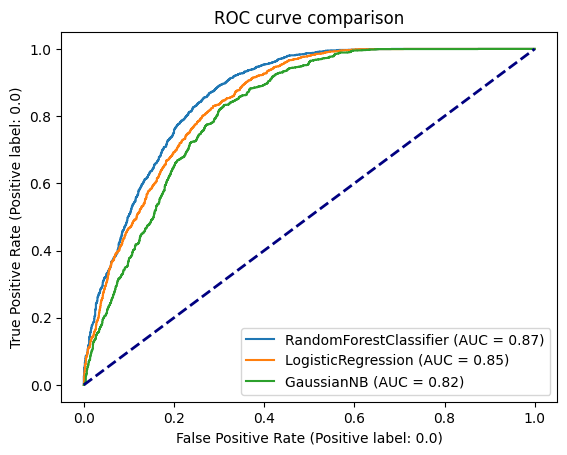

In [ ]:
# calcular y mostrar las curvas ROC de cada modelo de aprendizaje
# y sus métricas de área bajo la curva (AUC) sobre el conjunto de prueba
from sklearn.metrics import RocCurveDisplay

plt.figure()
lw = 2
disp = RocCurveDisplay.from_estimator(rfc_model, X_test, y_test)
RocCurveDisplay.from_estimator(lrc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(gnbc_model, X_test, y_test, ax=disp.ax_)
#RocCurveDisplay.from_estimator(svmc_model, X_test, y_test, ax=disp.ax_)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.title("ROC curve comparison")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# no se utilizo Máquina de Vectores de Soporte debido a que el tiempo de procesamiento era muy largo debido a la cantidad de datos.

##**Conclusión 1:** El modelo de RandomForest Classifier fue el mejor con un AUC de 0.87, teniendo la mejor capacidad predictiva; sin embargo, el modelo logit permite un mejor entendimiento de cuanto aporta cada variable al resultado final.

##**Concusión 2:** El calculo de los mejores hiperparametros por máquina mejora en gran medida los parametros de cada modelo.

##**Conclusión 3**: Para calcular los hiperparámetros de Máquina de Vectores de Soporte se necesita un mejor poder de computo o reducir la data para mejorar el proceso.

##**Conclusión 4:** El normalizado a una misma escala permite trabajar con datos de diferentes escalas, como tambien lo hace el rangeo de variables.

